In [40]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.hierarchical_portfolio import HRPOpt
import pypfopt.plotting as plotting
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import pandas as pd

tickers = ['BPAN4.SA', 'BRAP3.SA', 'COGN3.SA', 'INTB3.SA', 'LREN3.SA', 'PTBL3.SA', 'QUAL3.SA', 'VALE3.SA', 'CSAN3.SA', 'MGLU3.SA', 'WEGE3.SA', 'CTGP34.SA','MSFT34.SA', 'UNHH34.SA', 'GOLD11.SA']
start_date = '2020-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')
df = yf.download(tickers, start=start_date, end=end_date)
df = df.dropna()
df.head()

[*********************100%***********************]  15 of 15 completed


Price           Close                                                       \
Ticker       BPAN4.SA   BRAP3.SA  COGN3.SA   CSAN3.SA  CTGP34.SA GOLD11.SA   
Date                                                                         
2021-02-08  11.485641  10.859707  4.352119  19.095491  49.285088     10.51   
2021-02-09  11.538489  10.653227  4.303438  18.668861  49.077614     10.59   
2021-02-10  11.230209  10.664913  4.128184  18.751507  49.457989     10.66   
2021-02-11  11.274247  10.608423  4.118448  19.298754  48.783680     10.57   
2021-02-12  11.062857  10.581152  4.079504  19.564556  49.492565     10.50   

Price                                                    ...    Volume  \
Ticker       INTB3.SA   LREN3.SA    MGLU3.SA  MSFT34.SA  ... GOLD11.SA   
Date                                                     ...             
2021-02-08  17.335787  28.551401  237.362961  52.256485  ...  771766.0   
2021-02-09  17.973854  28.309090  238.088837  52.912701  ...  322189.0   
2021-02-10  17.524511  27.526762  229.559753  52.603889  ...  526797.0   
2021-02-11  17.461597  27.270609  232.735458  52.835495  ...  206748.0   
2021-02-12  17.946898  27.623686  235.094574  53.279419  ...  300797.0   

Price                                                                 \
Ticker       INTB3.SA  LREN3.SA MGLU3.SA MSFT34.SA PTBL3.SA QUAL3.SA   
Date                                                                   
2021-02-08  4609700.0   5194849  2755549    330141  8148800  2842800   
2021-02-09  3077700.0   9650469  2068600    153206  5382300  1875600   
2021-02-10  2997900.0  11074652  4280562     97900  4439400  4815700   
2021-02-11  3171100.0   9234324  2199228     97485  5107700  1820600   
2021-02-12  1712100.0  12047078  1617879     65155  2330700  1252000   

Price                                    
Ticker     UNHH34.SA  VALE3.SA WEGE3.SA  
Date                                     
2021-02-08     94868  28164400  9045200  
2021-02-09     11734  32303400  8388600  
2021-02-10     54688  40318300  9999000  
2021-02-11     13774  19775900  8179800  
2021-02-12     51998  14760700  5732600  

[5 rows x 75 columns]

In [41]:
df_close = df.loc[:, df.columns.get_level_values(level="Price") == 'Close']
df_close.columns = df_close.columns.droplevel(level="Price")
returns = df_close.pct_change(periods=1).dropna()
returns.head()

Ticker,BPAN4.SA,BRAP3.SA,COGN3.SA,CSAN3.SA,CTGP34.SA,GOLD11.SA,INTB3.SA,LREN3.SA,MGLU3.SA,MSFT34.SA,PTBL3.SA,QUAL3.SA,UNHH34.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2021-02-09,0.004601,-0.019013,-0.011186,-0.022342,-0.004210,0.007612,0.036806,-0.008487,0.003058,0.012558,0.069719,-0.006548,0.020662,0.002553,-0.005731
2021-02-10,-0.026718,0.001097,-0.040724,0.004427,0.007750,0.006610,-0.025000,-0.027635,-0.035823,-0.005836,-0.078794,0.008475,0.011203,0.004775,0.011999
2021-02-11,0.003921,-0.005297,-0.002358,0.029184,-0.013634,-0.008443,-0.003590,-0.009306,0.013834,0.004403,-0.024287,0.007470,-0.007192,-0.016895,0.011275
2021-02-12,-0.018750,-0.002571,-0.009456,0.013773,0.014531,-0.006622,0.027792,0.012947,0.010136,0.008402,-0.007576,-0.004325,-0.008222,0.008486,-0.003793
2021-02-17,0.011943,0.022828,0.016706,-0.001712,0.023406,-0.003810,-0.002504,0.016291,-0.015824,0.001086,-0.005453,0.024201,0.000592,0.026201,-0.031384


<Axes: >

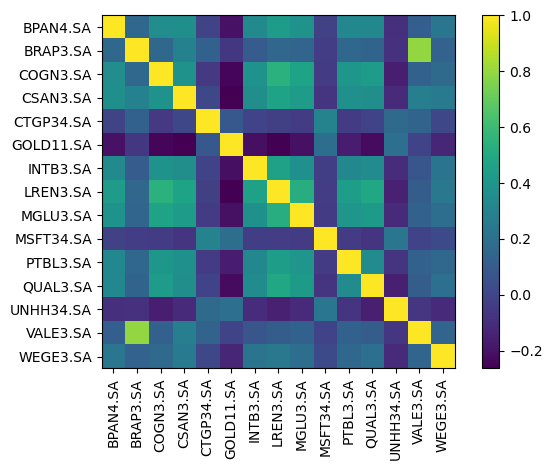

In [42]:
#returns = mean_historical_return(df_close, returns_data=True)
cov_matrix = returns.corr()
plotting.plot_covariance(cov_matrix)

<Axes: >

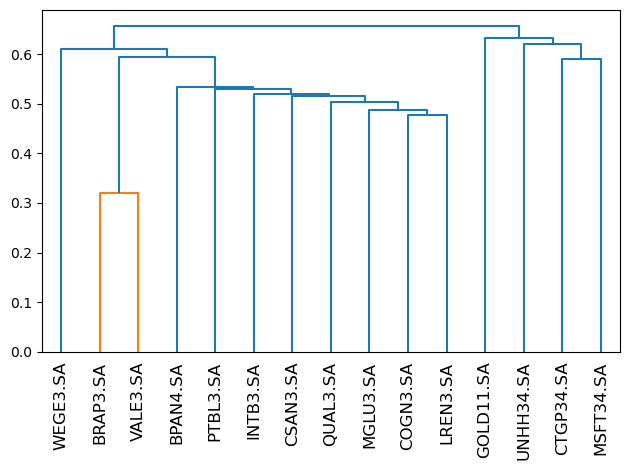

In [43]:
hrp = HRPOpt(returns, cov_matrix)
hrp.optimize()
plotting.plot_dendrogram(hrp)


In [44]:
hrp.portfolio_performance(verbose=True)


Expected annual return: 10.8%
Annual volatility: 11.4%
Sharpe Ratio: 0.95


(0.10754129340853343, 0.11353792116980498, 0.9471839214644143)

In [45]:
cleaned_weights = hrp.clean_weights()
cleaned_weights

OrderedDict([('BPAN4.SA', 0.0193),
             ('BRAP3.SA', 0.05281),
             ('COGN3.SA', 0.0228),
             ('CSAN3.SA', 0.03318),
             ('CTGP34.SA', 0.10714),
             ('GOLD11.SA', 0.31235),
             ('INTB3.SA', 0.03205),
             ('LREN3.SA', 0.03331),
             ('MGLU3.SA', 0.01377),
             ('MSFT34.SA', 0.12066),
             ('PTBL3.SA', 0.01566),
             ('QUAL3.SA', 0.0184),
             ('UNHH34.SA', 0.08979),
             ('VALE3.SA', 0.04809),
             ('WEGE3.SA', 0.0807)])